# 提升方法

## 1.提升方法AdaBoost方法

### 1.1 提升方法的基本思路

在分类问题中，通过改变训练样本的权重，学习多个分类器，并将这些分类器进行线性组合，提高分类的性能。大多数的提升方法是改变训练数据的概率分布。

存在两个问题：

* 1.在每一轮如何改变训练数据的权值或概率分布；
    * 提高那些被前一轮弱分类器错误分类样本的权值，降低那些被正确分类样本的权值。
* 2.如何将弱分类器组合成一个强分类器；
    * 采取加权多数表决的方法。加大分类误差率小的弱分类器的权值，使其在表决中起较大的作用，减小分类误差率大的弱分类器的权值，使其在表决中起较小的作用。

### 1.2 AdaBoost算法

可以认为是模型为加法模型、损失函数为指数函数、学习算法为前向分步算法时的二类分类学习方法。

#### 步骤：

* 1）给每个训练样本分配权重，初始权重w；
* 2）针对带有权值的样本进行训练，得到模型G；
* 3）计算模型G的误分类率；
* 4）计算模型G的系数；
* 5）根据误分类率e和当前权重向量更新权重向量w；
* 6）计算组合模型的误分类率；
* 7）当组合模型的误分类率或迭代次数低于一定阈值，停止迭代；否则，回到2）；

* 输入：训练数据集$T=\left \{(x_1,y_1),(x_2,y_2),...,(x_n,y_n)\right \} , y_i \in Y=\left \{-1,+1\right \} $
* 输出：最终分类器$G(x)$

(1) 初始化训练数据的权值分布
$$
D_1=(w_{11},...,w_{1i},...,w_{1N}),w_{1i}=\frac{1}{N}
$$

(2) 对$m=1,2,...,M$

(a) 使用具有权值分布$D_m$的训练数据集学习，得到基本分类器
    $$
    G_m(x):\chi \to \left \{-1,+1 \right \}
    $$

 (b) 计算$G_m(x)$在训练数据集上的分类误差率
$$
    e_m = \sum_{i=1}^{N}P(G_m(x_i) \ne y_i)=\sum_{i=1}^{N}w_{mi}I(G_m(x_i) \ne y_i)
$$

(c) 计算$G_m(x)$系数
$$
a_m=\frac{1}{2}log\frac{1-e_m}{e_m}
$$

(d) 更新训练数据集的权值分布
$$
D_{m+1}=(w_{m+q,q},...,w_{m+1,i},...,w_{m+1,N})
$$

$$
w_{m+1,i}=\frac{w_{mi}}{z_m}exp(-\alpha_my_iG_m(x_i))
$$
$Z_m$是规范化因子
$$
Z_m=\sum_{i=1}^{N}w_{mi}exp(-\alpha_my_iG_m(x_i)
$$
它使$D_{m+1}$成为一个概率分布。

(3) 构建基本分类器的线性组合
$$
f(x)=\sum_{m=1}{M}\alpha_mG_m(x)
$$
得到最终分类器
$$
G(x)=sign(f(x))=sign(\sum_{m=1}^{M}\alpha_mG_m(x))
$$

## 2.AdaBoost算法的训练误差分析

##### 定理1：AdaBoost的训练误差界

* AdaBoost算法最终分类器的训练误差界为
$$
\frac{1}{N}\sum_{i=1}^{N}I(G(x_i)\ne y_i)\le \frac{1}{N}\sum_{i}exp(-y_if(x_i))= \Pi_m Z_m
$$

在每一轮选取适当的$G_m$使得$Z_m$最小，从而使训练误差下降最快。

##### 定理2：二类分类问题AdaBoost的训练误差界

$$
\Pi_{m=1}^{M}Z_m=\Pi_{m=1}^{M}[2\sqrt{e_m(1-e+m)}]=\Pi_{m=1}^{M}\sqrt{(1-4\gamma_m^2)}\le exp(-2\sum_{m=1}^{M}\gamma_m^2)
$$
这里，$\gamma_m=\frac{1}{2}-e_m$

如果存在$\gamma > 0$，对所有$m$有$\gamma_m \ge \gamma$，则
$$
\frac{1}{N}\sum_{i=1}^{N}I(G(x_i)\ne y_i)\le exp(-2M\gamma^2)
$$

表明此条件下，AdaBoost的训练误差是以指数速率下降的。

## 3.AdaBoost算法的解释

* AdaBoost算法是模型为加法模型，损失函数为指数函数，学习算法为前向分步算法时的二类分类学习方法。

* 每一步中，极小化损失函数
$$
(\beta_m,\gamma_m)=argmin_{\beta,\gamma}\sum_{i=1}^{N}L(y_i,f_{m-1}(x_i)+\beta b(x_i;\gamma))
$$
得到参数$\beta_m, \gamma_m$

## 4.提升树

* 提升树是以分类树或回归树为基本分类器的提升方法。提升树采用加法模型与前向分步算法，以决策树为基函数的提升方法称为提升树。

### Bagging

* Bagging指的是一种叫做「Bootstrap Aggregating」（自助聚合）的技术。其实质是选取T个bootstrap样本，在每个样本安装一个分类器，然后并行训练模型。通常，在随机森林中，决策树是并行训练的。然后，将所有分类器的结果平均化，得到一个bagging分类器：
$$
H_T(x)=\frac{1}{T}\sum_{t}h_t(x)
$$

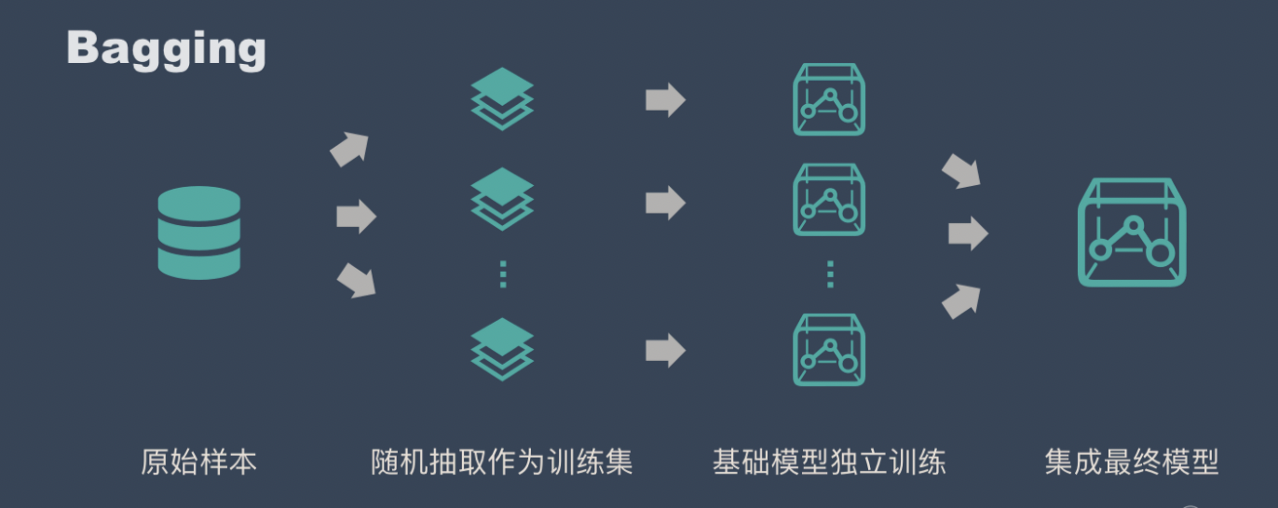

### Bagging与Boosting的区别

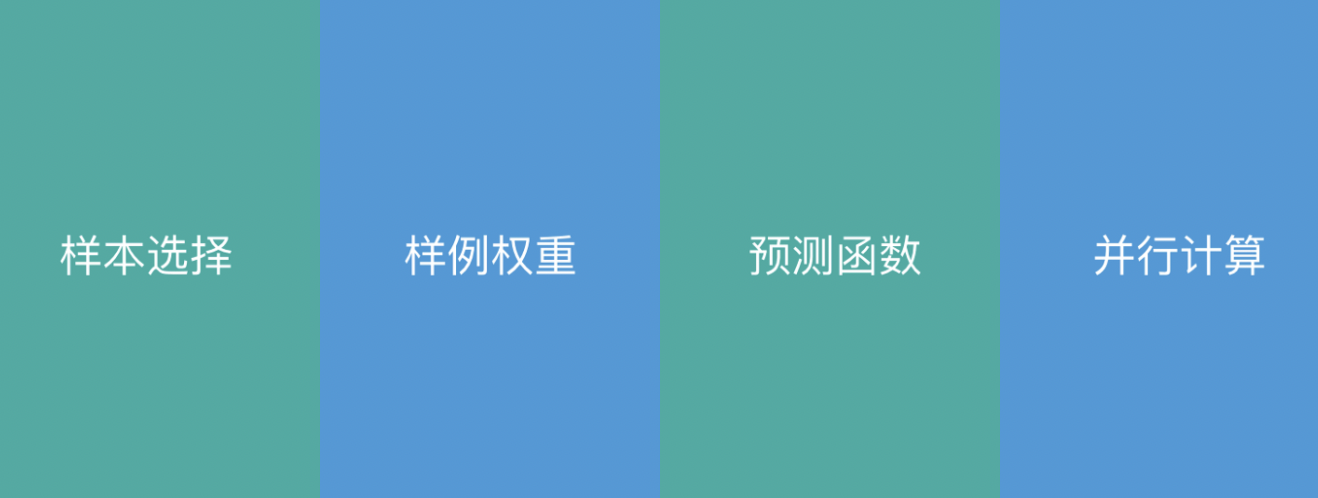

#### 1.样本选择

* Bagging：训练集是在原始集中有放回选取的，从原始集中选出的各轮训练集之间是独立的。
* Boosting：每一轮的训练集不变，只是训练集中每个样例在分类器中的权重发生变化。而权值是根据上一轮的分类结果进行调整。

#### 2.样例权重

* Bagging：使用均匀取样，每个样例的权重相等。
* Boosting：根据错误率不断调整样例的权值，错误率越大则权重越大。

#### 3.预测函数

* Bagging：所有预测函数的权重相等。
* Boosting：每个弱分类器都有相应的权重，对于分类误差小的分类器会有更大的权重。

#### 4.并行计算

* Bagging：各个预测函数可以并行生成。
* Boosting：各个预测函数只能顺序生成，因为后一个模型参数需要前一轮模型的结果。